In [ ]:
# import os
# from google.colab import drive

# # Mount Google Drive
# drive.mount('/content/gdrive')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
import json

# Load the JSON data
with open('/content/reddit_jokes.json') as f:
    data = json.load(f)

# Normalize the data into a DataFrame
jokes_df = pd.json_normalize(data)

# Select only the desired columns
jokes_df = jokes_df[['title', 'body', 'id', 'score']]

In [ ]:
# Display the DataFrame
jokes_df.head()

,title,body,id,score
0,I hate how you cant even say black paint anymore,"Now I have to say ""Leroy can you please paint ...",5tz52q,1
1,What's the difference between a Jew in Nazi Ge...,Pizza doesn't scream when you put it in the ov...,5tz4dd,0
2,I recently went to America....,...and being there really helped me learn abou...,5tz319,0
3,"Brian raises his hand and says, “He’s in Heaven.”",A Sunday school teacher is concerned that his ...,5tz2wj,1
4,You hear about the University book store worke...,He got caught trying to sell the two books to ...,5tz1pc,0


In [ ]:
jokes_df['body'][700]

'They teach it to jump on command by using flies as treats. Now when they say "Jump" the frog jumps.\n\nThen they chop off one leg. They say "Jump" and the frog jumps in a crooked path. So far so good.\n\nFinally, they chop off the other leg. They say "Jump" and the frog does not jump.\n\nIt has been concluded that frogs cannot hear without their legs.'

In [ ]:
jokes_df['body'] = jokes_df['body'].str.replace('\n\n', ' ').str.replace('\n', ' ')
jokes_df['title'] = jokes_df['title'].str.replace('\n\n', ' ').str.replace('\n', ' ')


In [ ]:
jokes_df['title'][700]

'A group of scientists run an experiment on a frog'

In [ ]:
jokes_df['body'][700]

'They teach it to jump on command by using flies as treats. Now when they say "Jump" the frog jumps. Then they chop off one leg. They say "Jump" and the frog jumps in a crooked path. So far so good. Finally, they chop off the other leg. They say "Jump" and the frog does not jump. It has been concluded that frogs cannot hear without their legs.'

In [ ]:
jokes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194553 entries, 0 to 194552
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   194553 non-null  object
 1   body    194553 non-null  object
 2   id      194553 non-null  object
 3   score   194553 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.9+ MB


194553 different jokes in a dataframe with rating column of title, body, ID, and score.

In [ ]:
jokes_df.isnull().sum()

title    0
body     0
id       0
score    0
dtype: int64

No null values.

In [ ]:
print(len(jokes_df['title'].unique()))

177283


In [ ]:
print(len(jokes_df['body'].unique()))

176951


In [ ]:
print(len(jokes_df['id'].unique()))

194553


There are duplicate jokes, so we need to do something about that. Will drop according to body column. 

In [ ]:
jokes_df.drop_duplicates(subset='body', keep='first', inplace=True)


In [ ]:
jokes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176951 entries, 0 to 194552
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   176951 non-null  object
 1   body    176951 non-null  object
 2   id      176951 non-null  object
 3   score   176951 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 6.8+ MB


In [ ]:
print(len(jokes_df['body'].unique()))

176951


In [ ]:
print(len(jokes_df['title'].unique()))

165294


In [ ]:
print(len(jokes_df['id'].unique()))

176951


Still some duplicate values according to title, so will drop those too. 

In [ ]:
jokes_df.drop_duplicates(subset='title', keep='first', inplace=True)


In [ ]:
jokes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165294 entries, 0 to 194552
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   165294 non-null  object
 1   body    165294 non-null  object
 2   id      165294 non-null  object
 3   score   165294 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 6.3+ MB


In [ ]:
print(len(jokes_df['body'].unique()))

165294


In [ ]:
print(len(jokes_df['title'].unique()))

165294


In [ ]:
print(len(jokes_df['id'].unique()))

165294


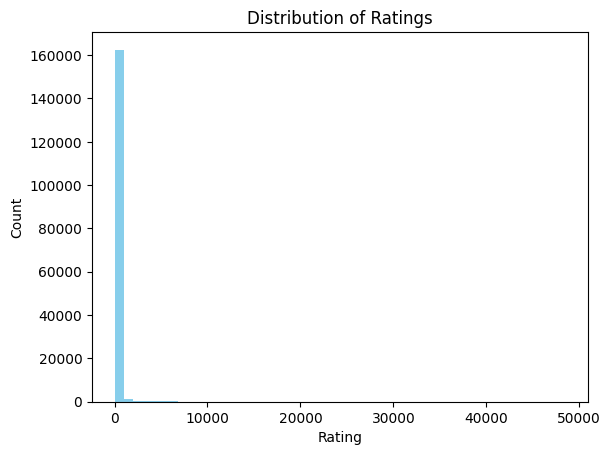

In [ ]:
import matplotlib.pyplot as plt

# plot histogram of ratings
plt.hist(jokes_df['score'], bins=50, color='skyblue')

# add x and y labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')

# show the plot
plt.show()


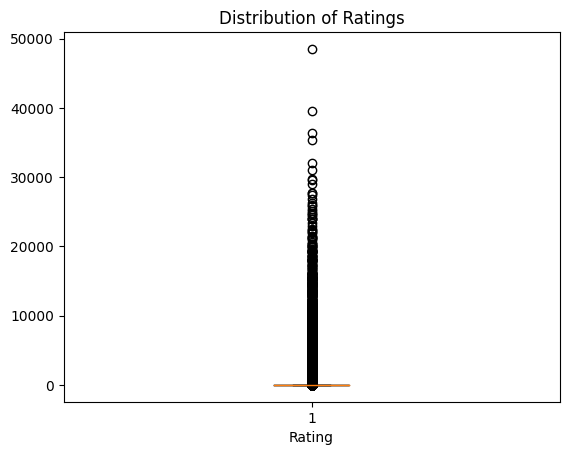

In [ ]:
plt.boxplot(jokes_df['score'])
plt.xlabel('Rating')
plt.title('Distribution of Ratings')
plt.show()


In [ ]:
jokes_df['joke_text'] = (jokes_df['title'].str.strip().str.rstrip('.') + 
                         '.' + 
                         ' ' + 
                         jokes_df['body'].str.strip())


In [ ]:
jokes_df['joke_text'][1400]

'Did you hear about the guy who proposed to marry his car?. He wanted a more engaging driver experience.'

In [ ]:
jokes_df['joke_text'] = (jokes_df['title'].str.strip().str.rstrip('.?') + 
                         jokes_df['title'].apply(lambda x: '.' if x.endswith('.') else '?') +
                         ' ' +
                         jokes_df['body'].str.strip())


In [ ]:
jokes_df['joke_text'][1400]

'Did you hear about the guy who proposed to marry his car? He wanted a more engaging driver experience.'

In [ ]:
# jokes_df['joke_text'][80000].replace('\\', '')


In [ ]:
# jokes_df['joke_text'] = jokes_df['joke_text'].replace(r'\\', '', regex=True)


In [ ]:
# jokes_df['joke_text'][80000]


In [ ]:
# jokes_df['joke_text'] = jokes_df['joke_text'].str.replace(r'\\', '', regex=True)


In [ ]:
# jokes_df['joke_text'][15000]

In [ ]:
import nltk
from nltk.corpus import stopwords
import string
import re

# Download the stopwords corpus
nltk.download('stopwords')

# Define a function to preprocess the jokes
def preprocess_jokes(jokes_df):
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    jokes_df['clean_joke'] = jokes_df['joke_text'].apply(lambda x: ' '.join([word.lower() for word in x.split() if (word.lower() not in stop_words) and (word.lower() not in string.punctuation)]))
    return jokes_df

# Define a function to remove punctuation
def remove_punctuation(text):
    # Define the regular expression pattern to match any punctuation character
    pattern = r'[^\w\s]'

    # Use the sub() function to replace any matches with an empty string
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

# Preprocess the jokes
preprocess_jokes(jokes_df)

# Apply the remove_punctuation function to the Clean_joke column
jokes_df['clean_joke'] = jokes_df['clean_joke'].apply(remove_punctuation)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
jokes_df.head()

,title,body,id,score,joke_text,clean_joke
0,I hate how you cant even say black paint anymore,"Now I have to say ""Leroy can you please paint ...",5tz52q,1,I hate how you cant even say black paint anymo...,hate cant even say black paint anymore say ler...
1,What's the difference between a Jew in Nazi Ge...,Pizza doesn't scream when you put it in the ov...,5tz4dd,0,What's the difference between a Jew in Nazi Ge...,whats difference jew nazi germany pizza pizza ...
2,I recently went to America....,...and being there really helped me learn abou...,5tz319,0,I recently went to America. ...and being there...,recently went america and really helped learn ...
3,"Brian raises his hand and says, “He’s in Heaven.”",A Sunday school teacher is concerned that his ...,5tz2wj,1,"Brian raises his hand and says, “He’s in Heave...",brian raises hand says hes heaven sunday schoo...
4,You hear about the University book store worke...,He got caught trying to sell the two books to ...,5tz1pc,0,You hear about the University book store worke...,hear university book store worker charged stea...


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

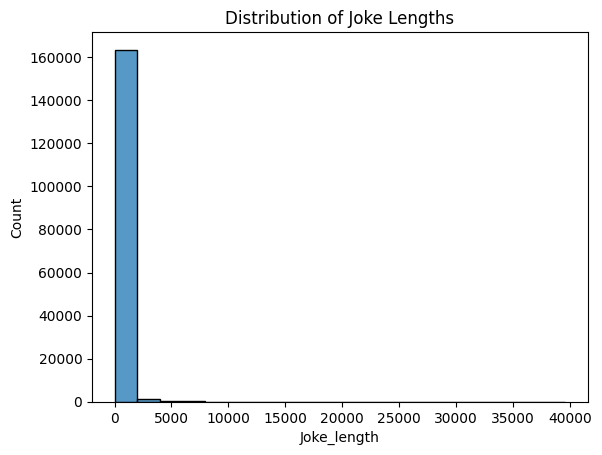

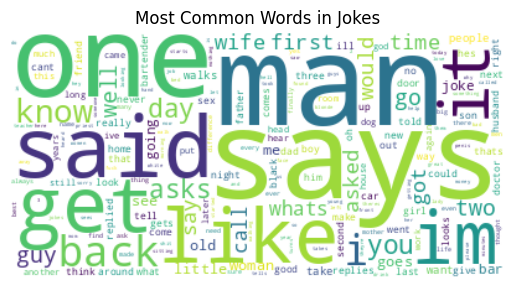

In [ ]:
# Visualize the distribution of joke lengths
jokes_df['Joke_length'] = jokes_df['joke_text'].apply(lambda x: len(x))
sns.histplot(data=jokes_df, x='Joke_length', bins=20)
plt.title('Distribution of Joke Lengths')
plt.show()

# Visualize the most common words in the jokes
from collections import Counter
from wordcloud import WordCloud

all_jokes = ' '.join(jokes_df['clean_joke'])
word_counts = Counter(all_jokes.split())
wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_counts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Jokes')
plt.show()

In [ ]:
max_length = 1000
jokes_df = jokes_df[jokes_df['joke_text'].apply(len) <= max_length]


In [ ]:
jokes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155820 entries, 0 to 194552
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   title        155820 non-null  object
 1   body         155820 non-null  object
 2   id           155820 non-null  object
 3   score        155820 non-null  int64 
 4   joke_text    155820 non-null  object
 5   clean_joke   155820 non-null  object
 6   Joke_length  155820 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 9.5+ MB


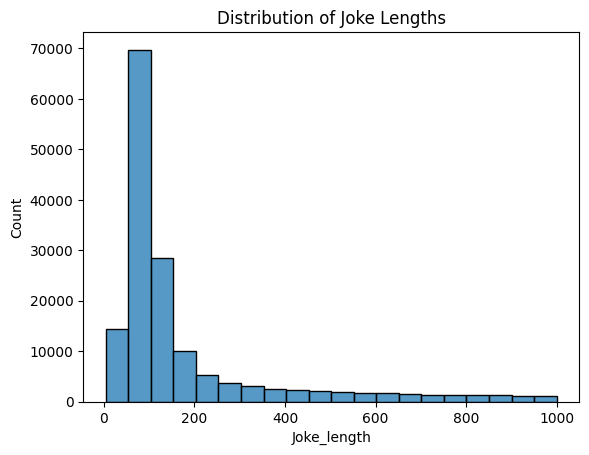

In [ ]:
sns.histplot(data=jokes_df, x='Joke_length', bins=20)
plt.title('Distribution of Joke Lengths')
plt.show()

<Axes: xlabel='Joke_length', ylabel='score'>

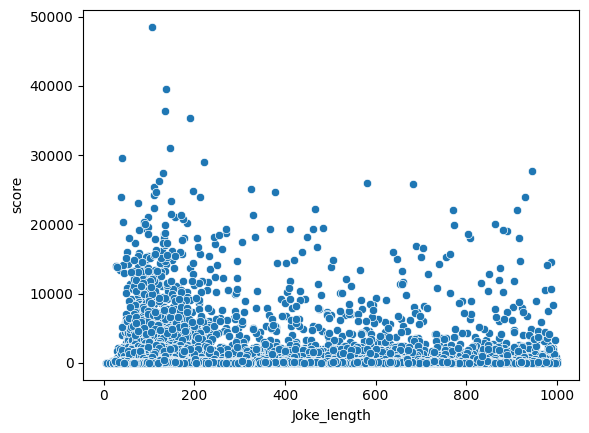

In [ ]:
import seaborn as sns

sns.scatterplot(data=jokes_df, x='Joke_length', y='score')


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

# Load the model from TensorFlow Hub
module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/5"
model = hub.load(module_url)


In [45]:
# Define batch size
BATCH_SIZE = 1000

# Initialize empty list to store encoded joke vectors
joke_vectors_list = []

# Encode jokes in batches
for i in range(0, len(jokes_df), BATCH_SIZE):
    # Get a batch of jokes
    batch_jokes = jokes_df["clean_joke"][i:i+BATCH_SIZE]
    
    # Encode the batch of jokes into vectors
    batch_vectors = model(batch_jokes).numpy()
    
    # Append the batch of vectors to the list
    joke_vectors_list.append(batch_vectors)



In [46]:
import numpy as np

    
# Concatenate the list of vectors into a single numpy array
joke_vectors_array = np.concatenate(joke_vectors_list)

# Print the shape of the joke vectors array
print(joke_vectors_array.shape)

(155820, 512)


In [47]:
print(joke_vectors_array[:10])


[[-0.0349613  -0.0341075  -0.10134754 ...  0.0303953   0.01411477
  -0.03717628]
 [ 0.02179682  0.01262555 -0.04302653 ... -0.00489561  0.02809056
   0.07904784]
 [ 0.04152024  0.01652905  0.01840518 ... -0.05423304  0.00167829
  -0.02633956]
 ...
 [ 0.03347958  0.00313051  0.07604442 ... -0.01767232 -0.00076526
  -0.10230934]
 [ 0.01022956  0.00196948  0.03023104 ...  0.0398141   0.03646496
   0.00935023]
 [ 0.00572099  0.0466338  -0.01475374 ... -0.00853588  0.02331162
   0.00925446]]


In [48]:
from sklearn.metrics.pairwise import cosine_similarity

batch_size = 1000

similarity_matrix = None

# Compute the pairwise cosine similarity between all joke vectors in batches
for i in range(0, len(joke_vectors_array), batch_size):
    batch_vectors = joke_vectors_array[i:i+batch_size]
    if len(batch_vectors) < batch_size:  # pad the last batch if necessary
        num_padding_rows = batch_size - len(batch_vectors)
        padding_vectors = np.zeros((num_padding_rows, joke_vectors_array.shape[1]))
        batch_vectors = np.concatenate([batch_vectors, padding_vectors], axis=0)
    if similarity_matrix is None:
        similarity_matrix = cosine_similarity(batch_vectors)
    else:
        similarity_matrix = np.concatenate(
            [similarity_matrix, cosine_similarity(batch_vectors)], axis=0)

# Print the shape of the similarity matrix
print(similarity_matrix.shape)


(156000, 1000)


In [49]:
import tensorflow_hub as hub

# Load the Universal Sentence Encoder model from TensorFlow Hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")

In [50]:
# Given a user's input, encode it into a vector representation using the same Universal Sentence Encoder model.
user_input = input("Enter a sentence: ")


Enter a sentence: Many men wish death upon me


In [51]:
#user_vector = np.array(embed([user_input]))[0]

In [52]:
#print(user_vector[:5])


In [53]:
#print(user_vector.shape)

In [54]:
# Compute the cosine similarity between the user's input vector and all joke vectors in the similarity matrix.
#user_similarities = cosine_similarity([user_vector], joke_vectors_array)[0]


In [55]:
#user_input_vector = embed([user_input])[0]

In [56]:
#print(joke_vectors_array.shape)


In [57]:
# Get user input
#user_input = input("Enter a joke: ")


In [58]:
user_input_vector = embed([user_input])[0].numpy()
similarity_scores = cosine_similarity(user_input_vector.reshape(1, -1), joke_vectors_array)

In [59]:
# Get the number of jokes to recommend from the user
num_jokes = int(input("How many jokes would you like to see? "))

How many jokes would you like to see? 20


In [60]:
# Get the top-n jokes with the highest similarity scores
top_indices = np.argsort(similarity_scores, axis=1)[:, ::-1][:, :num_jokes].ravel()

In [61]:
top_jokes = [jokes_df.iloc[i] for i in top_indices]

In [62]:
top_jokes

[title                                   I hope death is a woman.
 body                        That way, it will never come for me.
 id                                                        4nnh3b
 score                                                        269
 joke_text      I hope death is a woman. That way, it will nev...
 clean_joke                    hope death woman way never come me
 Joke_length                                                   61
 Name: 39556, dtype: object,
 title                                I hope Death is a woman....
 body                         That way it will never come for me.
 id                                                        50kg91
 score                                                         76
 joke_text      I hope Death is a woman. That way it will neve...
 clean_joke                    hope death woman way never come me
 Joke_length                                                   60
 Name: 13519, dtype: object,
 title            

In [63]:
# Print the top-n jokes
print(f"Top {num_jokes} jokes:")
for i, joke in enumerate(top_jokes):
    print(f"{i+1}. {joke.joke_text}")


Top 20 jokes:
1. I hope death is a woman. That way, it will never come for me.
2. I hope Death is a woman. That way it will never come for me.
3. I hope Death is a woman? That way it will never come for me
4. Why do men, on average, die before women? Because they want to.
5. I hope Death is my father. because he'll never get me.
6. Why do most men die before their wives? Because they want to
7. Why do men die before their wives? Because we want to!
8. I would prefer to die in an apocolypse? I don't want to die, but if everyone else is doing it
9. I hope Death is a man. That way it will come quickly and be over before I know it.
10. What's the cruelest curse to wish upon a single guy? "I wish his hands were made of stone."
11. What kind of genie only grants wishes to men? A misogenie.
12. Words of wisdom? I'd rather kill myself than to commit suicide.
13. I'd like to die like my grandfather, who passed away while sleeping? Not like his four passengers...
14. I'm going to spoil your life

NOW TIME FOR  supervised learning model that uses the Universal Sentence Encoder to encode the textual data and a simple regression model to predict the score of each joke.

In [64]:
jokes_df.head()

,title,body,id,score,joke_text,clean_joke,Joke_length
0,I hate how you cant even say black paint anymore,"Now I have to say ""Leroy can you please paint ...",5tz52q,1,I hate how you cant even say black paint anymo...,hate cant even say black paint anymore say ler...,107
1,What's the difference between a Jew in Nazi Ge...,Pizza doesn't scream when you put it in the ov...,5tz4dd,0,What's the difference between a Jew in Nazi Ge...,whats difference jew nazi germany pizza pizza ...,128
2,I recently went to America....,...and being there really helped me learn abou...,5tz319,0,I recently went to America. ...and being there...,recently went america and really helped learn ...,202
3,"Brian raises his hand and says, “He’s in Heaven.”",A Sunday school teacher is concerned that his ...,5tz2wj,1,"Brian raises his hand and says, “He’s in Heave...",brian raises hand says hes heaven sunday schoo...,575
4,You hear about the University book store worke...,He got caught trying to sell the two books to ...,5tz1pc,0,You hear about the University book store worke...,hear university book store worker charged stea...,158


In [65]:
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X = jokes_df[['clean_joke', 'Joke_length']]
y = jokes_df['score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the feature encoder
module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/5"
model = hub.load(module_url)


In [66]:

# Encode the data in batches
batch_size = 1000
num_batches_train = len(X_train) // batch_size + 1
num_batches_test = len(X_test) // batch_size + 1

X_train_encoded = []
for i in range(num_batches_train):
    start_idx = i * batch_size
    end_idx = (i+1) * batch_size
    batch = X_train.iloc[start_idx:end_idx]
    batch_encoded = model(batch['clean_joke'].values).numpy()
    batch_encoded = np.concatenate([batch_encoded, batch['Joke_length'].values.reshape(-1, 1)], axis=1)
    X_train_encoded.append(batch_encoded)
X_train_encoded = np.concatenate(X_train_encoded, axis=0)

X_test_encoded = []
for i in range(num_batches_test):
    start_idx = i * batch_size
    end_idx = (i+1) * batch_size
    batch = X_test.iloc[start_idx:end_idx]
    batch_encoded = model(batch['clean_joke'].values).numpy()
    batch_encoded = np.concatenate([batch_encoded, batch['Joke_length'].values.reshape(-1, 1)], axis=1)
    X_test_encoded.append(batch_encoded)
X_test_encoded = np.concatenate(X_test_encoded, axis=0)

In [67]:

# # Encode the training data
# X_train_encoded = model(X_train['clean_joke'].values).numpy()
# X_train_encoded = np.concatenate([X_train_encoded, X_train['joke_length'].values.reshape(-1, 1)], axis=1)

# # Encode the testing data
# X_test_encoded = model(X_test['clean_joke'].values).numpy()
# X_test_encoded = np.concatenate([X_test_encoded, X_test['joke_length'].values.reshape(-1, 1)], axis=1)


In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Initialize the model
regression_model = LinearRegression()

# Fit the model to the training data
regression_model.fit(X_train_encoded, y_train)

# Predict the scores for the test data
y_pred = regression_model.predict(X_test_encoded)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 657634.3734585479
